## _**Veri Bilimi için Programlama Dersi Final Projesi**_
## _Süheyl Çavuşoğlu_
Bu projede https://ourworldindata.org/covid-deaths adresinde yer alan Covid-19 veri seti üzerinde
veri analizi gerçekleştirilecektir. Gerçekleştirilecek analizin tüm adımlarının yer aldığı bir Jupyter
Notebook hazırlanacaktır. Analiz adımları aşağıdaki gibidir:


1. İndirilen veri setini DataFrame yapısı haline dönüştürünüz.

In [273]:
import pandas as pd

df = pd.read_csv("covid-data.csv") #Burada "ipynb" dosyası ile aynı yola kayıtlı olan "csv" dosyasını okuyoruz.
df.head()

C:\Users\suheyl\AppData\Local\Temp/ipykernel_22916/3871877265.py:3: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("covid-data.csv") #Burada "ipynb" dosyası ile aynı yola kayıtlı olan "csv" dosyasını okuyoruz.


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


2. Veri setinin sahip olduğu örnek ve kolon sayıları listeleyeniz ve veri setindeki kolonlarla ilgili basit istatistikleri (minimum, maksimum, standart sapma vb.) gösteriniz.


In [274]:
df.shape

(245784, 67)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245784 entries, 0 to 245783
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    245784 non-null  object 
 1   continent                                   231967 non-null  object 
 2   location                                    245784 non-null  object 
 3   date                                        245784 non-null  object 
 4   total_cases                                 231705 non-null  float64
 5   new_cases                                   231397 non-null  float64
 6   new_cases_smoothed                          230198 non-null  float64
 7   total_deaths                                212248 non-null  float64
 8   new_deaths                                  212152 non-null  float64
 9   new_deaths_smoothed                         210966 non-null  float64
 

In [276]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [277]:
df.describe().T # basit istatistiksel veriler

,count,mean,std,min,25%,50%,75%,max
total_cases,231705.0,4.918110e+06,3.047956e+07,1.000000,5129.000000,5.724700e+04,5.914650e+05,6.582130e+08
new_cases,231397.0,1.213739e+04,8.354288e+04,0.000000,0.000000,4.500000e+01,8.910000e+02,4.083950e+06
new_cases_smoothed,230198.0,1.216917e+04,8.153789e+04,0.000000,5.286000,8.528600e+01,1.068857e+03,3.439392e+06
total_deaths,212248.0,7.731703e+04,3.954637e+05,1.000000,119.000000,1.285000e+03,1.051200e+04,6.681775e+06
new_deaths,212152.0,1.308832e+02,7.062503e+02,0.000000,0.000000,5.000000e-01,1.200000e+01,1.773300e+04
...,...,...,...,...,...,...,...,...
population,244729.0,1.407597e+08,6.923106e+08,47.000000,836783.000000,6.948395e+06,3.369661e+07,7.975105e+09
excess_mortality_cumulative_absolute,8215.0,5.024999e+04,1.382689e+05,-37726.100000,60.550000,6.465400e+03,3.651575e+04,1.240196e+06
excess_mortality_cumulative,8215.0,1.011862e+01,1.333335e+01,-28.450000,0.830000,7.720000e+00,1.582000e+01,7.655000e+01
excess_mortality,8254.0,1.409918e+01,2.589216e+01,-95.920000,0.082500,7.415000e+00,1.915000e+01,3.767700e+02


In [278]:
df.isnull().sum() # kolonlardaki eksik verileri kontrol ettik ancak tam olarak istediğimiz şekilde gözlemleyemedik. Biraz ekleme yaparak daha iyi bir görünüm kazandırabiliriz.

iso_code                                        0
continent                                   13817
location                                        0
date                                            0
total_cases                                 14079
                                            ...  
population                                   1055
excess_mortality_cumulative_absolute       237569
excess_mortality_cumulative                237569
excess_mortality                           237530
excess_mortality_cumulative_per_million    237569
Length: 67, dtype: int64

In [279]:
missing_values = df.isnull().sum() # eksik verileri topladım.
missing_percentage = (missing_values / len(df)) * 100  # eksik verileri yüzdesel olarak göstermek için bu adımı uyguladım.
missing_percentage_sorted = missing_percentage.sort_values(ascending=False) # büyükten küçüğe doğru sıraladım.
missing_percentage_sorted[:10] # en fazla eksik veriye sahip 10 kolonu gözlemledim


excess_mortality_cumulative_per_million    96.657634
excess_mortality_cumulative                96.657634
excess_mortality_cumulative_absolute       96.657634
weekly_icu_admissions                      96.645835
weekly_icu_admissions_per_million          96.645835
excess_mortality                           96.641767
weekly_hosp_admissions                     91.990528
weekly_hosp_admissions_per_million         91.990528
icu_patients                               86.521499
icu_patients_per_million                   86.521499
dtype: float64

3. Veri setindeki
'continent', 'location','date', 'total_cases_per_million', 'total_deaths_per_million',
'gdp_per_capita', 'extreme_poverty', 'population', 'population_density', 'aged_65_older',
'aged_70_older', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
'male_smokers', 'hospital_beds_per_thousand','life_expectancy',
'human_development_index'
sütunlarını seçip yeni new_df adında bir DataFrame oluşturunuz.

In [280]:
new_df = df[['continent', 'location','date', 'total_cases_per_million', 'total_deaths_per_million', 'gdp_per_capita', 'extreme_poverty', 'population', 'population_density', 'aged_65_older',
             'aged_70_older', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'hospital_beds_per_thousand','life_expectancy', 'human_development_index']]
new_df.head()


,continent,location,date,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Asia,Afghanistan,2020-02-24,0.122,NaN,1803.987,NaN,41128772.0,54.422,2.581,1.337,597.029,9.59,NaN,NaN,0.5,64.83,0.511
1,Asia,Afghanistan,2020-02-25,0.122,NaN,1803.987,NaN,41128772.0,54.422,2.581,1.337,597.029,9.59,NaN,NaN,0.5,64.83,0.511
2,Asia,Afghanistan,2020-02-26,0.122,NaN,1803.987,NaN,41128772.0,54.422,2.581,1.337,597.029,9.59,NaN,NaN,0.5,64.83,0.511
3,Asia,Afghanistan,2020-02-27,0.122,NaN,1803.987,NaN,41128772.0,54.422,2.581,1.337,597.029,9.59,NaN,NaN,0.5,64.83,0.511
4,Asia,Afghanistan,2020-02-28,0.122,NaN,1803.987,NaN,41128772.0,54.422,2.581,1.337,597.029,9.59,NaN,NaN,0.5,64.83,0.511


In [281]:
# new_df'deki kolonlarda bulunan eksik verilerin yüzdesini sözlük şeklinde gösterecek olursak;
new_df_null_dict = {}
new_df_columns_list = list(new_df.columns)
for i in new_df_columns_list:
    null_percentage = (new_df[i].isnull().sum() / len(new_df[i])) * 100
    new_df_null_dict[i] = null_percentage
    
new_df_null_dict


{'continent': 5.621602708068874,
 'location': 0.0,
 'date': 0.0,
 'total_cases_per_million': 6.157439052175894,
 'total_deaths_per_million': 14.068450346645836,
 'gdp_per_capita': 19.597288676236044,
 'extreme_poverty': 47.61823389642939,
 'population': 0.42923868111838037,
 'population_density': 12.884483937115515,
 'aged_65_older': 20.270237281515477,
 'aged_70_older': 19.841812323015333,
 'cardiovasc_death_rate': 19.65099436903948,
 'diabetes_prevalence': 15.458288578589329,
 'female_smokers': 39.080656185919345,
 'male_smokers': 39.91431500829997,
 'hospital_beds_per_thousand': 28.402987989454154,
 'life_expectancy': 8.26457377209257,
 'human_development_index': 21.514012303485988}

4. new_df’de 'date' sütununun ismini 'Date',' location' sütununun ismini 'Country' olarak değiştiriniz.


In [282]:
new_df = new_df.rename(columns={'date': 'Date'}) # Burada 'date' kolonunun ismini 'Date' olarak değiştiriyoruz.
new_df = new_df.rename(columns={'location': 'Country'}) # Burada 'location' kolonunun ismini 'Country' olarak değiştiriyoruz.
new_df.head()


,continent,Country,Date,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Asia,Afghanistan,2020-02-24,0.122,NaN,1803.987,NaN,41128772.0,54.422,2.581,1.337,597.029,9.59,NaN,NaN,0.5,64.83,0.511
1,Asia,Afghanistan,2020-02-25,0.122,NaN,1803.987,NaN,41128772.0,54.422,2.581,1.337,597.029,9.59,NaN,NaN,0.5,64.83,0.511
2,Asia,Afghanistan,2020-02-26,0.122,NaN,1803.987,NaN,41128772.0,54.422,2.581,1.337,597.029,9.59,NaN,NaN,0.5,64.83,0.511
3,Asia,Afghanistan,2020-02-27,0.122,NaN,1803.987,NaN,41128772.0,54.422,2.581,1.337,597.029,9.59,NaN,NaN,0.5,64.83,0.511
4,Asia,Afghanistan,2020-02-28,0.122,NaN,1803.987,NaN,41128772.0,54.422,2.581,1.337,597.029,9.59,NaN,NaN,0.5,64.83,0.511


5. Date sütununu date time veri tipine dönüştürünüz. (Not:Bu aşamadan sonra analizlerinize new_df DataFrame’i üzerinden devam ediniz.)


In [283]:
new_df['Date'] = pd.to_datetime(new_df['Date']) # Burada "Date" kolonunun veri tipini "date time" veri tipine dönüştürüyoruz.
new_df.dtypes # Burada "Date" kolonunun veri tipinin datetime olduğu görülebilmektedir.


continent                             object
Country                               object
Date                          datetime64[ns]
total_cases_per_million              float64
total_deaths_per_million             float64
gdp_per_capita                       float64
extreme_poverty                      float64
population                           float64
population_density                   float64
aged_65_older                        float64
aged_70_older                        float64
cardiovasc_death_rate                float64
diabetes_prevalence                  float64
female_smokers                       float64
male_smokers                         float64
hospital_beds_per_thousand           float64
life_expectancy                      float64
human_development_index              float64
dtype: object

In [284]:
new_df.tail() # Veri setini indirdiğimiz anda 2022-12-27 tarihine kadar covid vakalarının yazılmış olduğunu görüyoruz.

,continent,Country,Date,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
245779,Africa,Zimbabwe,2022-12-23,15929.682,345.393,1899.775,21.4,16320539.0,42.729,2.822,1.882,307.846,1.82,1.6,30.7,1.7,61.49,0.571
245780,Africa,Zimbabwe,2022-12-24,15929.682,345.393,1899.775,21.4,16320539.0,42.729,2.822,1.882,307.846,1.82,1.6,30.7,1.7,61.49,0.571
245781,Africa,Zimbabwe,2022-12-25,15929.682,345.393,1899.775,21.4,16320539.0,42.729,2.822,1.882,307.846,1.82,1.6,30.7,1.7,61.49,0.571
245782,Africa,Zimbabwe,2022-12-26,15929.682,345.393,1899.775,21.4,16320539.0,42.729,2.822,1.882,307.846,1.82,1.6,30.7,1.7,61.49,0.571
245783,Africa,Zimbabwe,2022-12-27,15929.682,345.393,1899.775,21.4,16320539.0,42.729,2.822,1.882,307.846,1.82,1.6,30.7,1.7,61.49,0.571


6. Veri kümesinde yer alan ülkelerin GDP(‘gdp_per_capita')(Gayri safi yurt içi hasıla) değerlerin günümüze en yakın tarihe göre büyükten küçüğe doğru sıralayınız ve çubuk grafik ile görselleştiriniz

In [285]:
# Burada 'gdp_per_capita' kolonuna göre büyükten küçüğe sıralama yapıyoruz ve birden fazla yazılmış ülkeleri silmek için drop_dublicates methodunu kullanıyoruz.
new_df_sorted_GDP = new_df.sort_values(by=["gdp_per_capita"], ascending=False).drop_duplicates(subset="Country") 
GDP_countries = new_df_sorted_GDP.Country.to_list() # GDP verilerine göre sıralanmış verilerin ülkelerini seçiyoruz ve listeye aktarıyoruz ki elimizde GDP verileri ve ülke isimleri olsun ve grafik çizdirebilelim.

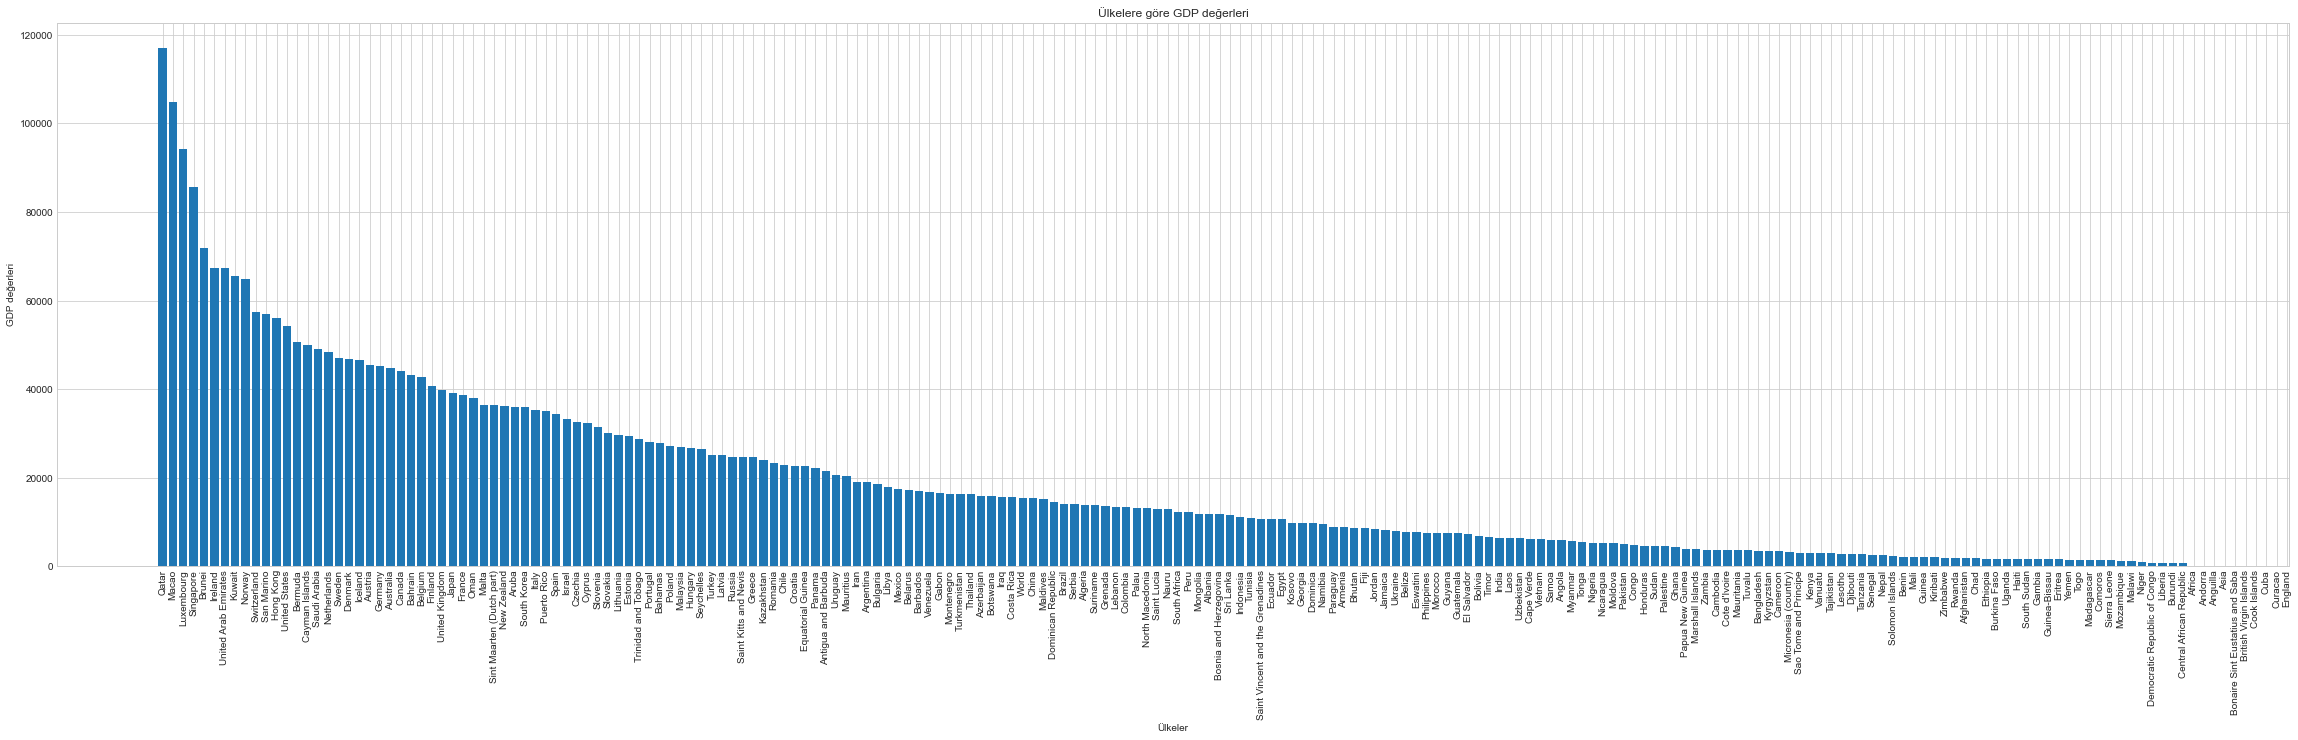

In [286]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 10))
plt.bar(GDP_countries, new_df_sorted_GDP['gdp_per_capita'])
plt.xlabel("Ülkeler") # X eksenini etiketliyoruz.
plt.ylabel("GDP değerleri") # Y eksenini etiketliyoruz.
plt.title("Ülkelere göre GDP değerleri") # Grafiğin başlığını belirliyoruz.
plt.xticks(rotation=90) # Ülkelerin ismini biraz daha okunur yapabilmek için 90 derece döndürdüm.
plt.show()

7. Her kıtadada bulunan ülke sayısını bulunuz.

In [287]:
grouped_by_continent = new_df.groupby('continent') #Burada new_df üzerinden kıtaları gruplandırıyoruz.
# Burada gruplandırılan kıtalarda bulunan ülkeleri buluyoruz ve aynı ülke isminin birden fazla kez geçmemesi için unique methodunu kullanıyoruz ve bu bize kıtalardaki ülkelerin isimlerini veriyor.
grouped_by_continent['Country'].apply(lambda x: x.unique())


continent
Africa           [Algeria, Angola, Benin, Botswana, Burkina Fas...
Asia             [Afghanistan, Armenia, Azerbaijan, Bahrain, Ba...
Europe           [Albania, Andorra, Austria, Belarus, Belgium, ...
North America    [Anguilla, Antigua and Barbuda, Aruba, Bahamas...
Oceania          [Australia, Cook Islands, Fiji, French Polynes...
South America    [Argentina, Bolivia, Brazil, Chile, Colombia, ...
Name: Country, dtype: object

In [288]:
country_counts = grouped_by_continent['Country'].apply(lambda x: x.unique()).apply(len) # Kıtalarda bulunan ülkelerin isimlerini elde ettikten sonra apply(len) ile bu ülkelerin sayılarını yazdırıyoruz.
country_counts

continent
Africa           56
Asia             51
Europe           55
North America    37
Oceania          23
South America    13
Name: Country, dtype: int64

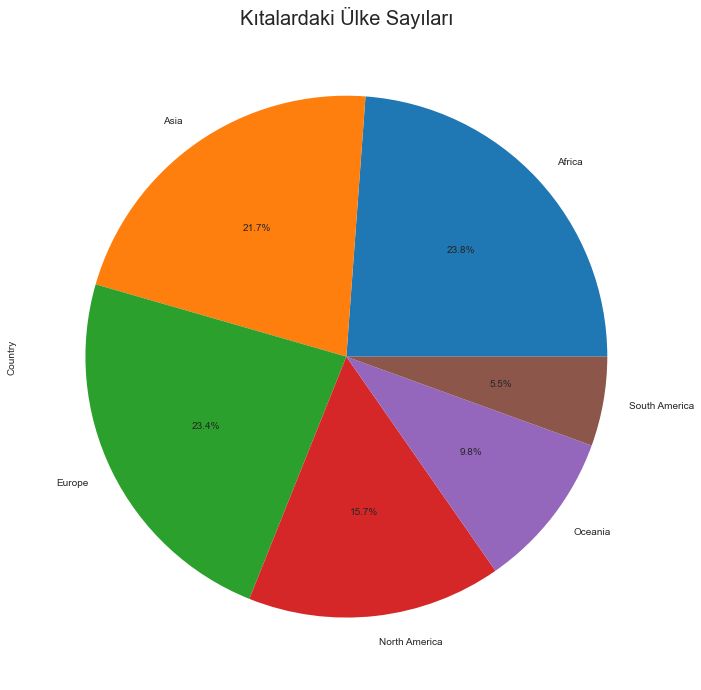

In [289]:
# her bir kıtada bulunan ülkelerin yüzdelerini pasta grafiği ile gösterdim.
country_counts.plot(kind='pie', figsize=(12, 12), autopct='%1.1f%%') 
plt.title('Kıtalardaki Ülke Sayıları', size = 20)
#plt.style.use('seaborn-whitegrid')
plt.show()

8. Diyabet yaygınlığı (diabetes_prevalence) en düşük olan 10 ülkeyi listeleyiniz.

In [291]:
# Burada ülkelerin (Country) ve diyabet yaygınlığının (diabetes_prevalence) olduğu kolonları seçiyoruz.
ulkelervediabet = new_df[['Country', 'diabetes_prevalence']]

# Veri setini diabetes_prevalence sütununa göre sıralıyoruz.
new_df_sorted_countries = ulkelervediabet.sort_values(by='diabetes_prevalence').drop_duplicates(subset='Country')
en_dusukler = new_df_sorted_countries.head(10)
en_dusukler

,Country,diabetes_prevalence
23058,Benin,0.99
245783,Zimbabwe,1.82
80604,Gambia,1.91
86808,Greenland,2.16
135336,Mali,2.42
123920,Liberia,2.42
50684,Cote d'Ivoire,2.42
157682,Niger,2.42
34007,Burkina Faso,2.42
138348,Mauritania,2.42


9. Ülkelerin diyabet yaygınlığı (diabetes_prevalence) ve yaşam beklentisi (life_expectancy) istatistikleri arasındaki ilişkiyi scatter plot ile görselleşitiriniz.

In [292]:
# Burada Country, diabetes_prevalence ve life_expectancy kolonlarını seçiyoruz.
new_df_countries = new_df[["Country", "diabetes_prevalence", "life_expectancy"]].drop_duplicates(subset="Country")
new_df_countries

,Country,diabetes_prevalence,life_expectancy
0,Afghanistan,9.59,64.83
1038,Africa,NaN,NaN
2087,Albania,10.08,78.57
3124,Algeria,6.73,76.88
4161,Andorra,7.97,83.73
...,...,...,...
241692,Western Sahara,NaN,70.26
241693,World,8.51,72.58
242764,Yemen,5.35,66.12
243756,Zambia,3.94,63.89


In [293]:
new_df_countries.sort_values(by = 'life_expectancy', ascending=False) # ülkeleri 'life_expectancy' değerlerine göre büyükten küçüğe sıraladım.

,Country,diabetes_prevalence,life_expectancy
143193,Monaco,5.46,86.75
189111,San Marino,5.64,84.97
96881,Hong Kong,8.33,84.86
110417,Japan,5.72,84.63
130153,Macao,NaN,84.24
...,...,...,...
175964,Pitcairn,NaN,NaN
192171,Scotland,NaN,NaN
203862,South America,NaN,NaN
232886,Upper middle income,NaN,NaN


In [294]:
len(new_df_countries)

248

In [295]:
new_df_countries.isnull().sum()

Country                 0
diabetes_prevalence    42
life_expectancy        21
dtype: int64

In [296]:
new_df_countries = new_df_countries.dropna() # eksik veriye sahip ülkeleri veri setinden çıkarttım.
len(new_df_countries)

206

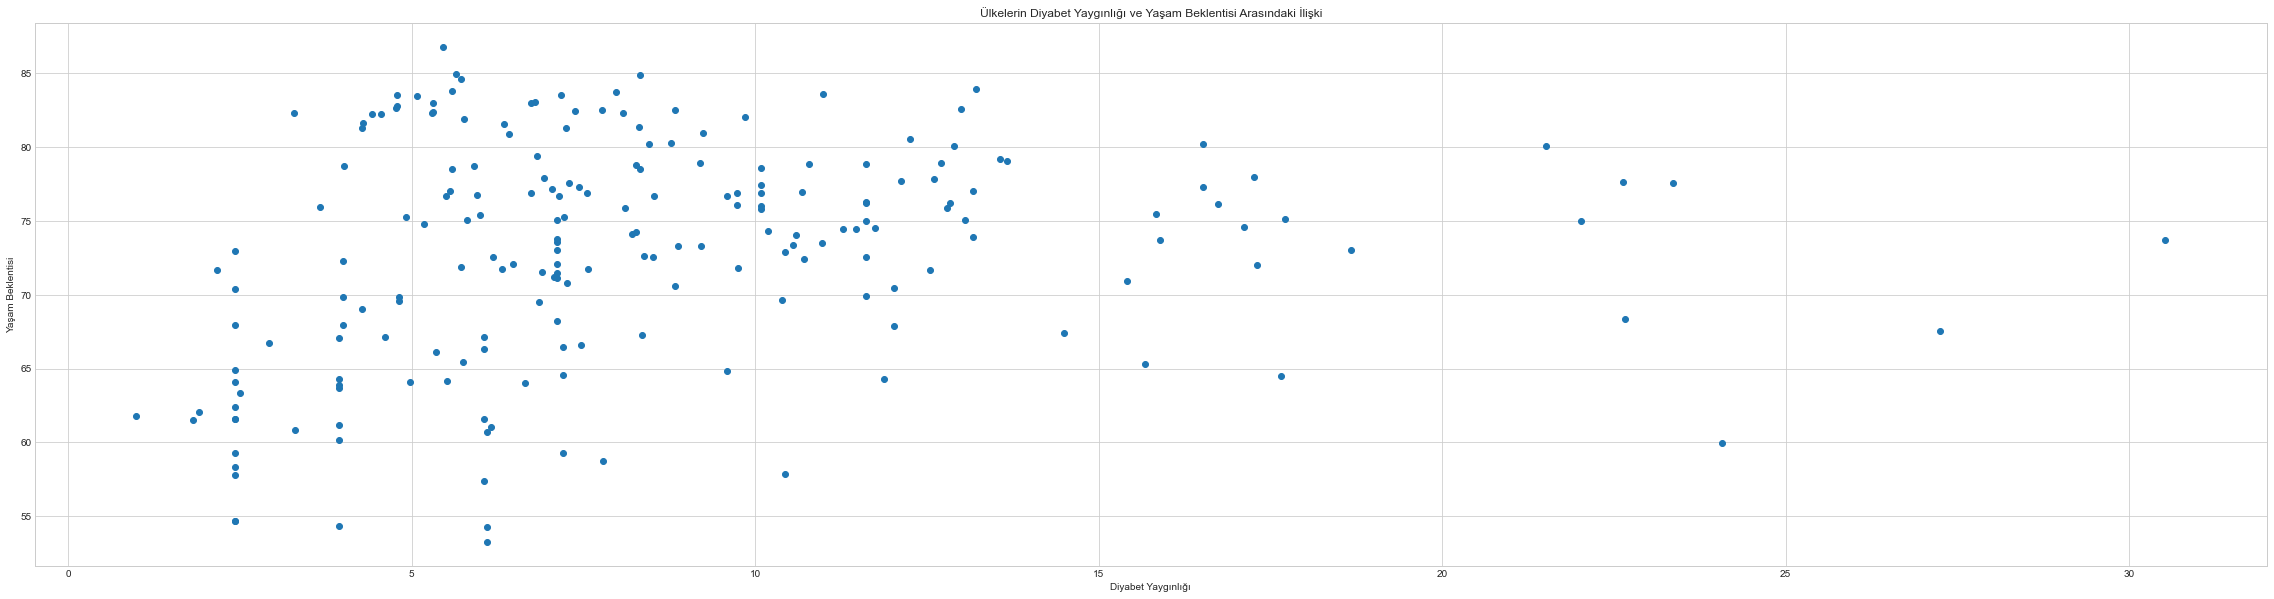

In [297]:
plt.figure(figsize=(40, 10)) # daha rahat okunabilmesi için grafik boyutunu büyüttüm.
plt.scatter(new_df_countries["diabetes_prevalence"], new_df_countries["life_expectancy"]) # diabet_prevalence ve life_expectancy arasındaki ilişki için scatter plot çizdiriyoruz.
plt.xlabel("Diyabet Yaygınlığı") # X ekseninin etiketi.
plt.ylabel("Yaşam Beklentisi") # Y ekseninin etiketi.
plt.title("Ülkelerin Diyabet Yaygınlığı ve Yaşam Beklentisi Arasındaki İlişki")  # Grafik başlığı
plt.show()

10. En iyi medikal altyapıya sahip olan ilk 10 ülkeyi listeleyeniz.

In [298]:
# Burada Country ve hospital_beds_per_thousand kolonlarını seçiyoruz.
best_medical_countries = new_df[["Country", "hospital_beds_per_thousand"]].drop_duplicates(subset="Country")

# Hastane yatak sayısına göre ülkeleri çoktan aza doğru sıralıyoruz.
sorted_best_medical_countries = best_medical_countries.sort_values(by = "hospital_beds_per_thousand", ascending=False)

#İlk 10 ülkeyi gösteriyoruz.
sorted_best_medical_countries.head(10)

,Country,hospital_beds_per_thousand
143193,Monaco,13.800
160768,North Korea,13.200
110417,Japan,13.050
204902,South Korea,12.270
19704,Belarus,11.000
227840,Ukraine,8.800
181375,Russia,8.050
81979,Germany,8.000
32982,Bulgaria,7.454
224659,Turkmenistan,7.400


11. Milyon başına en yüksek vaka ve ölüm sayısına sahip ilk 10 ülkeyi pasta grafikleri ile ayrı
ayrı görselleştiriniz.

In [299]:
# İlk olarak vaka sayılarını çoktan aza doğru sıralayarak,milyon başına en yüksek vaka sayılarını bulalım. Ayrıca birden fazla yazılan ülkeleri çıkartarak her ülkeyi bir kez yazdıralım.
total_cases = new_df[["Country", "total_cases_per_million"]].sort_values(by = "total_cases_per_million", ascending=False).drop_duplicates(subset="Country")
# Sıralanan ülkelerden ilk 10 tanesine bakalım.
total_cases.head(10)

,Country,total_cases_per_million
55120,Cyprus,701455.457
190143,San Marino,682932.621
73587,Faeroe Islands,652484.139
14575,Austria,636151.638
85092,Gibraltar,620466.995
200982,Slovenia,613724.696
5187,Andorra,597247.097
32981,Brunei,594249.023
77887,France,578941.324
58237,Denmark,575352.598


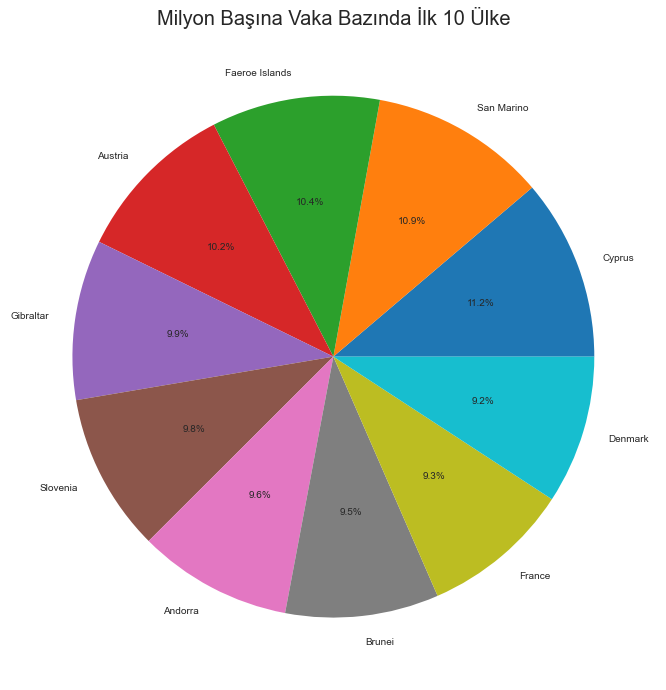

In [202]:
# Bulduğumuz bu 10 ülkenin total_cases_per_million değerlerini pasta grafiğinde gösterelim.
plt.figure(figsize=(12, 12))
plt.pie(total_cases.head(10)["total_cases_per_million"], labels = total_cases.head(10)["Country"], autopct='%1.1f%%')
plt.title('Milyon Başına Vaka Bazında İlk 10 Ülke', fontsize=20)
plt.show()

In [300]:
# Şimdi de ölüm sayılarını çoktan aza doğru sıralayarak,milyon başına en yüksek ölüm sayılarını bulalım. Ayrıca birden fazla yazılan ülkeleri çıkartarak her ülkeyi bir kez yazdıralım.
total_deaths = new_df[["Country", "total_deaths_per_million"]].sort_values(by = "total_deaths_per_million", ascending=False).drop_duplicates(subset="Country")
total_deaths.head(10)

,Country,total_deaths_per_million
174900,Peru,6405.746
34005,Bulgaria,5617.407
28913,Bosnia and Herzegovina,5017.427
98975,Hungary,4859.790
162760,North Macedonia,4592.077
81977,Georgia,4512.624
146262,Montenegro,4450.774
52058,Croatia,4352.464
56155,Czechia,4010.581
199922,Slovakia,3687.103


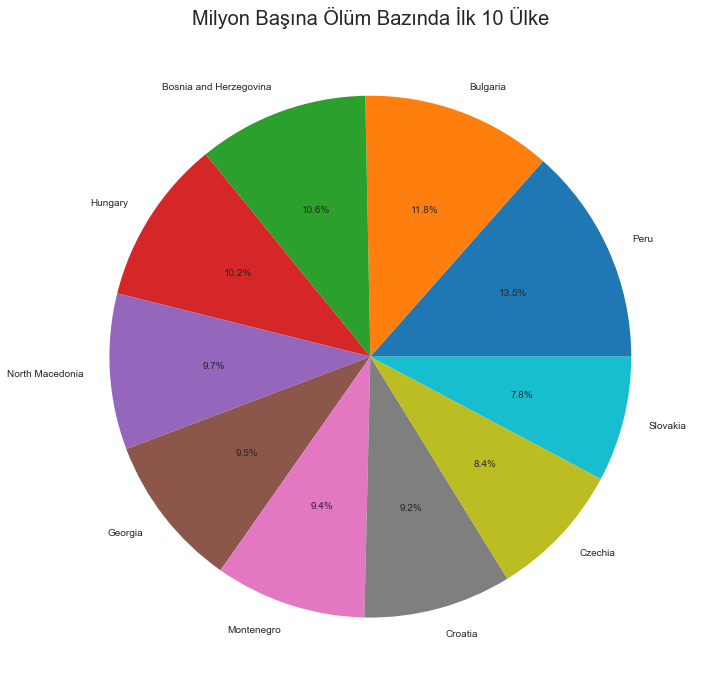

In [301]:
# Bulduğumuz 10 ülkenin total_deaths_per_million değerlerini pasta grafiğinde gösterelim.
plt.figure(figsize=(12, 12))
plt.pie(total_deaths.head(10)["total_deaths_per_million"], labels = total_deaths.head(10)["Country"], autopct='%1.1f%%')
plt.title('Milyon Başına Ölüm Bazında İlk 10 Ülke', fontsize=20)
plt.show()

12. Kıtalar bazında vakalar ve ölüm oranları stackplot ile görselleştiriniz.

In [302]:
continent_and_cases = new_df[["continent", "total_cases_per_million"]] # İlk olarak kıtaların ve vakaların olduğu dataframe'i oluşturalım.
cases_by_continent = continent_and_cases.groupby("continent").sum() # Oluşturduğumuz dataframe'i kıtalara göre gruplandıralım ve vakaları toplayalım.
continents_and_deaths = new_df[["continent", "total_deaths_per_million"]] # Şimdi de kıtaların ve ölümlerin olduğu dataframe'i oluşturalım.
deaths_by_continent = continents_and_deaths.groupby("continent").sum() # Oluşturduğumuz dataframe'i kıtalara göre gruplandıralım ve ölümleri toplayalım.
deaths_by_continent.sort_values(by= 'total_deaths_per_million', ascending = False)

,total_deaths_per_million
continent,
Europe,7.059206e+07
North America,2.335158e+07
South America,1.924463e+07
Asia,1.786934e+07
Africa,9.271143e+06
Oceania,3.122806e+06


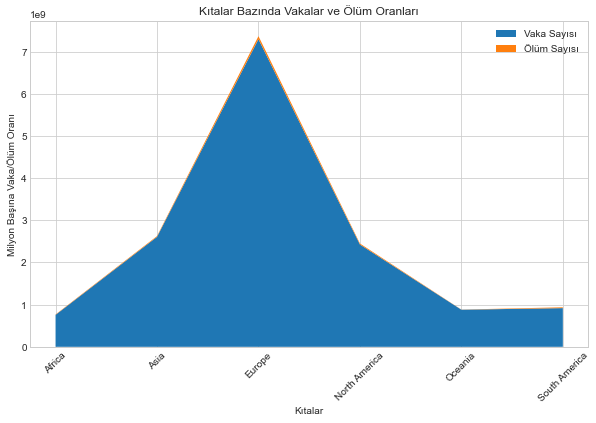

In [303]:
# Kıtaları, vakaları ve ölümleri hazırladıktan sonra stackplot çizdirelim.
kitalar = cases_by_continent.index # Kıtaların indekslerini belirleyelim ki grafikte indekslerine göre gösterebilelim.

plt.figure(figsize=(10, 6))
plt.stackplot(kitalar, cases_by_continent["total_cases_per_million"], deaths_by_continent["total_deaths_per_million"], labels = ["Vaka Sayısı", "Ölüm Sayısı"])

plt.xlabel("Kıtalar")
plt.ylabel("Milyon Başına Vaka/Ölüm Oranı")
plt.title("Kıtalar Bazında Vakalar ve Ölüm Oranları")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

13. Ölüm oranı %10'un üzerinde olan ülkeleri listeleyiniz.

In [304]:
# İlk olarak ülkelerin ve ölüm oranlarının yer aldığı dataframe'i hazırlayalım.
new_df_deaths = new_df[["Country", "total_deaths_per_million"]]
death_rates_over10perc = new_df_deaths[new_df_deaths["total_deaths_per_million"] > 10].drop_duplicates(subset="Country") # Ölüm oranının %10'dan fazla olduğu satırları seçiyoruz.
death_rates_over10perc_countries = death_rates_over10perc["Country"].to_list() # Bu ülkeleri listeye aktaralım ve yazdıralım.
print(len(death_rates_over10perc_countries)) # ölüm oranı %10'un üzerinde olan ülkelerin sayısı
print(death_rates_over10perc_countries)

223
['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Europe', 'European Union', 'Faeroe Islands', 'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia',

14. 2020 yılı Mart ayındaki tüm ülkelerin Coronavirüs vaka sayılarını günlük bazda çizgi grafik ile görselleştiriniz.

In [305]:
# İlk olarak ülkelerin, tarihin ve vakaların yer aldığı dataframe'i hazırlayalım.
new_df_cases = new_df[["Country", "Date", "total_cases_per_million"]]
# Daha sonra 2020 yılındaki vakaları seçelim.
cases_2020 = new_df_cases[new_df_cases["Date"].dt.year == 2020]
# 2020'yi seçtikten sonra Mart ayını seçebiliriz.
cases_2020_march = cases_2020[cases_2020["Date"].dt.month == 3]
cases_2020_march

,Country,Date,total_cases_per_million
6,Afghanistan,2020-03-01,0.122
7,Afghanistan,2020-03-02,0.122
8,Afghanistan,2020-03-03,0.122
9,Afghanistan,2020-03-04,0.122
10,Afghanistan,2020-03-05,0.122
...,...,...,...
244778,Zimbabwe,2020-03-27,0.306
244779,Zimbabwe,2020-03-28,0.429
244780,Zimbabwe,2020-03-29,0.429
244781,Zimbabwe,2020-03-30,0.429


In [306]:
# milyon başına ölüm sayılarını bu şekilde büyükten küçüğe sıralayarak da gözlemleyebiliriz.
unique_countries = cases_2020_march.drop_duplicates(subset=['Country'])
unique_countries.sort_values(by = 'total_cases_per_million', ascending= False).head(10)

,Country,Date,total_cases_per_million
236773,Vatican,2020-03-06,1237.624
146265,Montserrat,2020-03-18,226.603
6205,Anguilla,2020-03-28,125.968
225213,Turks and Caicos Islands,2020-03-28,87.478
204941,South Korea,2020-03-01,72.102
30953,British Virgin Islands,2020-03-28,63.833
195259,Seychelles,2020-03-15,56.004
44338,China,2020-03-01,55.983
184298,Saint Kitts and Nevis,2020-03-25,41.945
16631,Bahrain,2020-03-01,31.924


In [307]:
grouped_cases_by_country = cases_2020_march.groupby("Country") # 2020 Martındaki verileri ülkelere göre gruplandırıyoruz.
total_cases_by_country = grouped_cases_by_country["total_cases_per_million"].sum()
total_cases_by_country

Country
Afghanistan       27.746
Africa            28.879
Albania          785.277
Algeria          107.406
Andorra        34906.009
                 ...    
Vietnam           25.605
Wales              0.000
World           1125.587
Zambia             9.691
Zimbabwe           3.248
Name: total_cases_per_million, Length: 215, dtype: float64

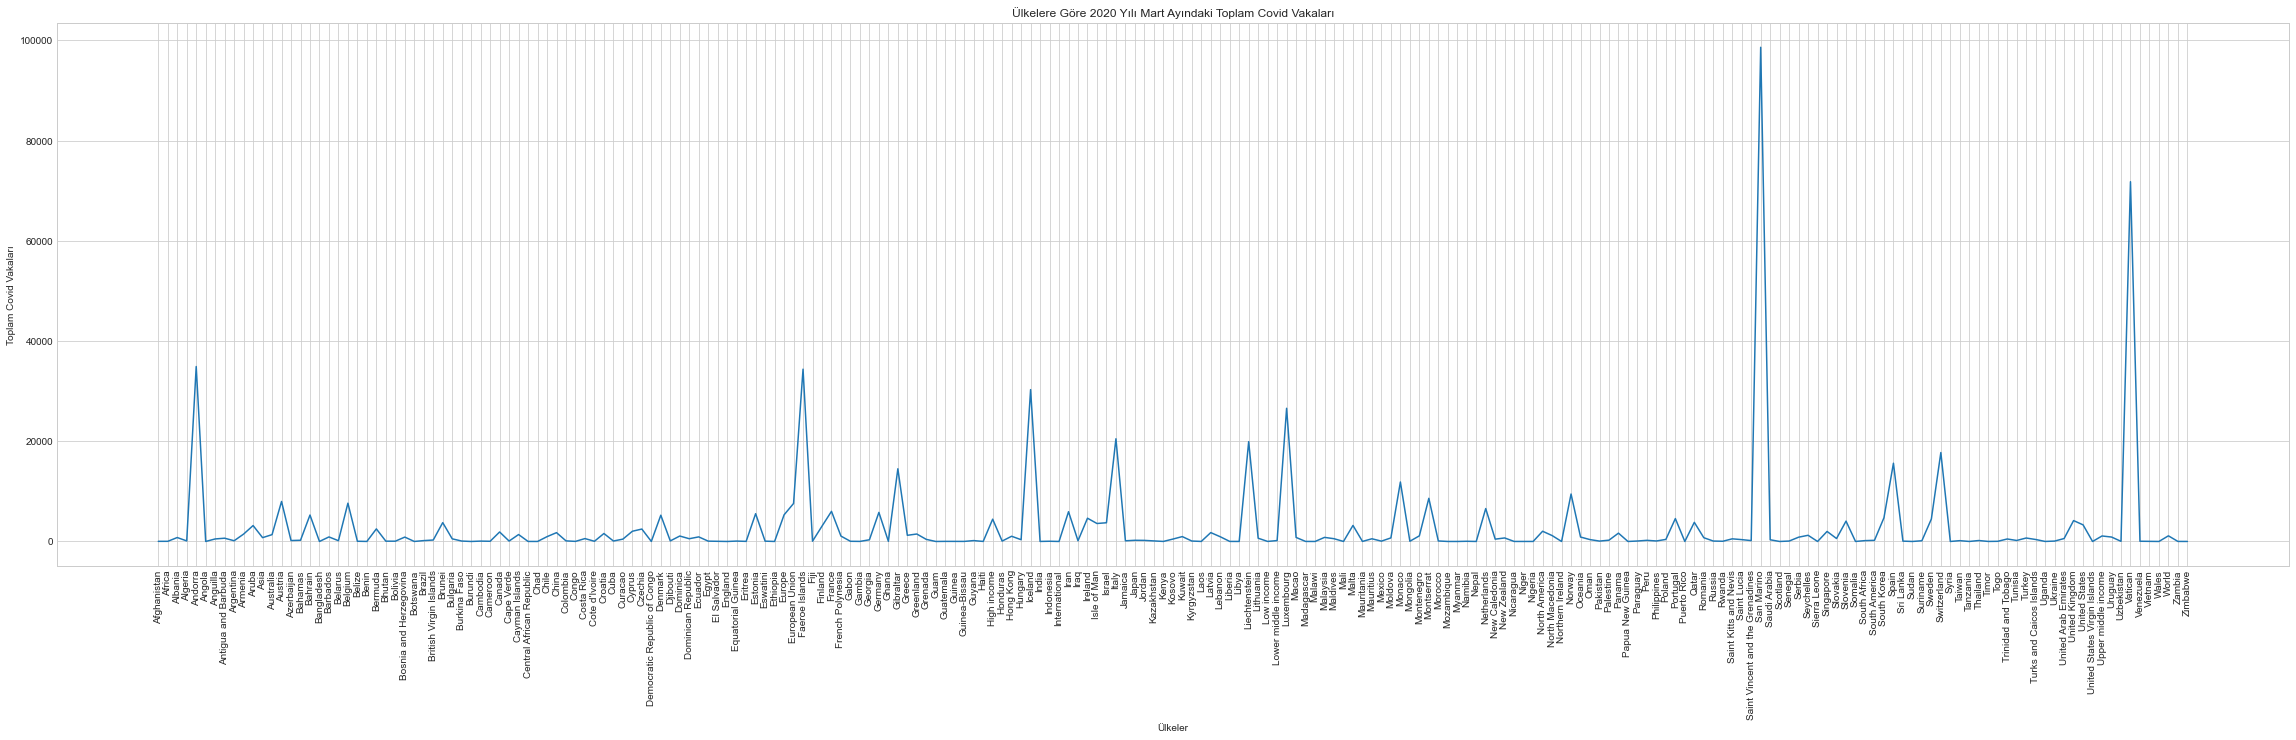

In [308]:
# Hazırladığımız veriler ile çizgi grafiği oluşturalım.
plt.figure(figsize=(40,10))
plt.plot(total_cases_by_country.index,total_cases_by_country.values) # X ekseninde gösterebilmek için ülkelerin indekslerini alıyoruz. Y ekseninde gösterebilmek için vaka sayılarının değerlerini alıyoruz.
plt.xlabel("Ülkeler")
plt.ylabel("Toplam Covid Vakaları")
plt.title("Ülkelere Göre 2020 Yılı Mart Ayındaki Toplam Covid Vakaları")
plt.xticks(rotation=90)
plt.show()

Son olarak da seçtiğimiz 3 ülkenin 2020 Mart ayı boyunca günlük vaka sayılarını gözlemleyelim.

C:\Users\suheyl\AppData\Local\Temp/ipykernel_22916/1000279523.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_2020_march['daily_cases_per_million'] = cases_2020_march.groupby('Country')['total_cases_per_million'].diff()


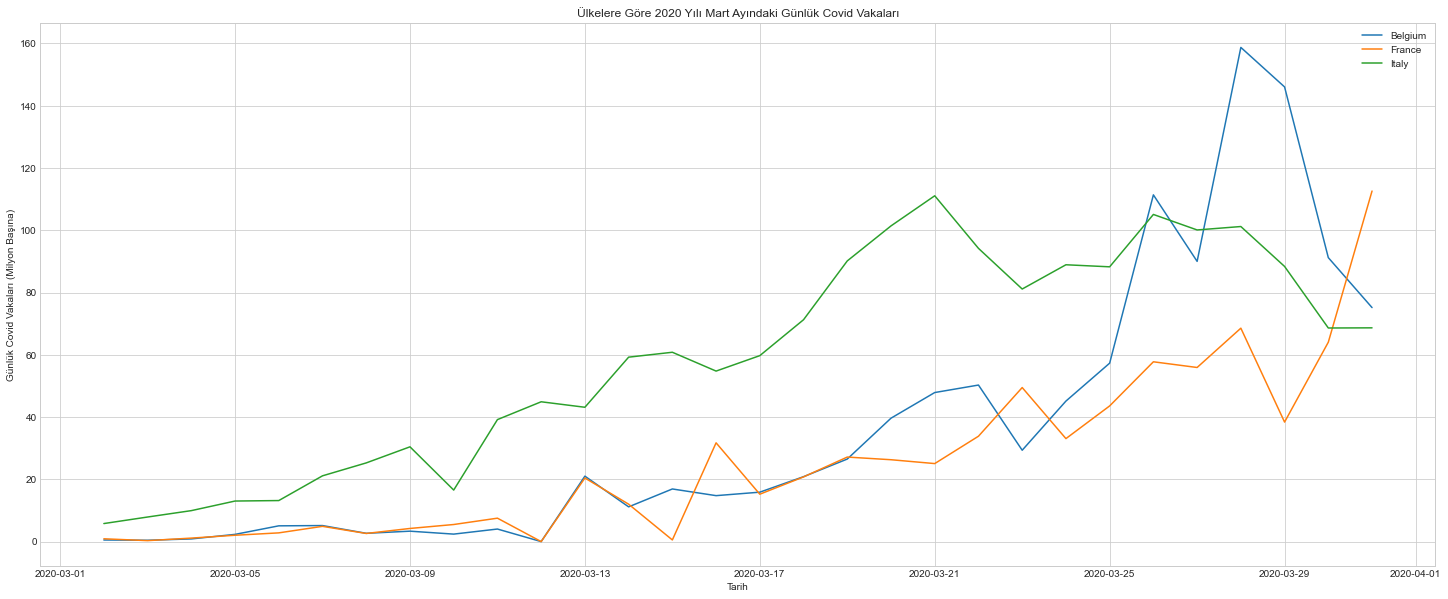

In [309]:
# Öncelikle veri setimizi tarih sütununa göre sıralayalım.
new_df_cases = new_df.sort_values("Date")

# 2020 yılı Mart ayına ait verileri seçelim.
mask = (new_df_cases['Date'].dt.year == 2020) & (new_df_cases['Date'].dt.month == 3)
cases_2020_march = new_df_cases.loc[mask]

# Her bir ülkenin günlük vaka sayılarını hesaplayalım.
cases_2020_march['daily_cases_per_million'] = cases_2020_march.groupby('Country')['total_cases_per_million'].diff()
plt.figure(figsize=(25,10))
# Her bir ülkenin günlük vaka sayılarını çizelim.
countries_to_plot = ['Belgium', 'France', 'Italy']  # Örnek olarak bu ülkeleri seçtik. İstendiği taktirde farklı ülkelerin de grafikleri çizdirilebilir.
for country in countries_to_plot:
    country_data = cases_2020_march[cases_2020_march['Country'] == country]
    plt.plot(country_data['Date'], country_data['daily_cases_per_million'], label=country)

plt.xlabel("Tarih")
plt.ylabel("Günlük Covid Vakaları (Milyon Başına)")
plt.title("Ülkelere Göre 2020 Yılı Mart Ayındaki Günlük Covid Vakaları")
plt.legend()
plt.show()